In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs) 

Text(0,0.5,'Magnitud')

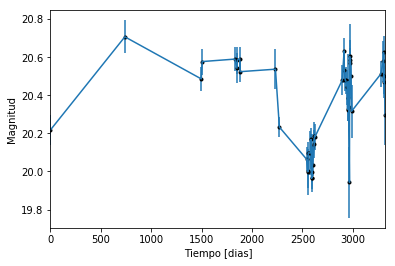

In [2]:
data = np.genfromtxt('LC_19055_U.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [6]:
%%capture capt
sample = model.run_mcmc(20000)

ValueError: maxlags must be None or strictly positive < 50

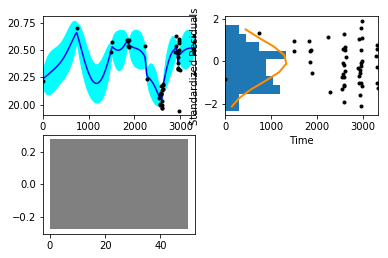

In [7]:
sample.assess_fit()

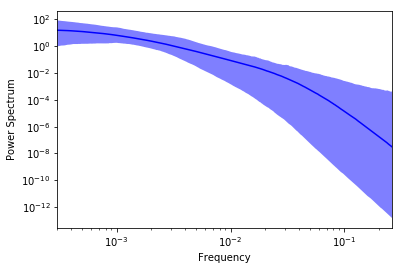

In [8]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [9]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.000376389,0.721784,'Medida del nivel de ruido')

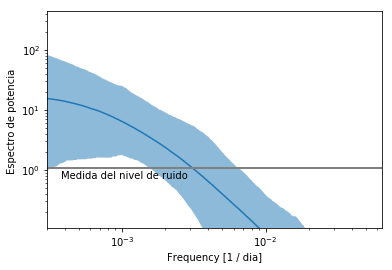

In [10]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))

Text(0.5,1,'Prediccion , valor esperado ')

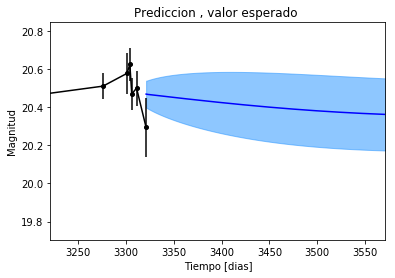

In [11]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado ')

Text(0.5,1,'Prediccion, Caminos simulados')

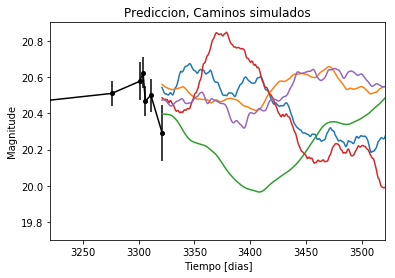

In [12]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


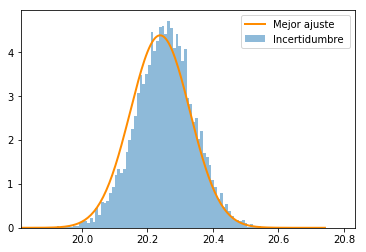

In [13]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')

Text(0.5,1,'Interpolacion, camino simulado')

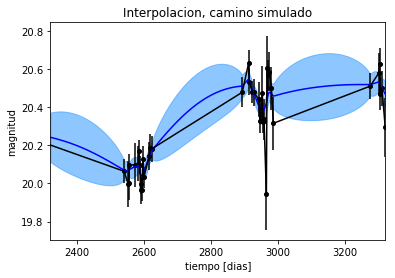

In [14]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

Text(0.5,1,'Interpolacion, camino simulado')

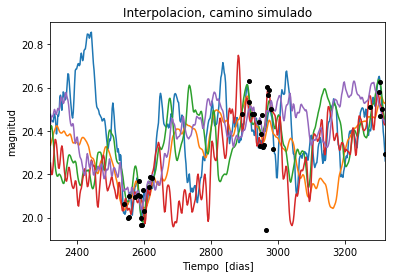

In [15]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

In [16]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [17]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 612.397180142
Median: 0.018280643324
Standard deviation: 0.10730869799
68% credibility interval: [ 0.00210148  0.13797773]
95% credibility interval: [ 0.00049502  0.41328149]
99% credibility interval: [  3.31695710e-04   4.91182341e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 478.965140145
Median: 0.00880391814066
Standard deviation: 0.0611746021909
68% credibility interval: [ 0.00108823  0.05347582]
95% credibility interval: [ 0.00038956  0.22441067]
99% credibility interval: [  3.20135862e-04   3.81067060e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 540.038174792
Median: 0.0406232864616
Standard deviation: 0

In [18]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 341.658079305
Median: 0.0356684625556
Standard deviation: 0.142446250978
68% credibility interval: [ 0.          0.27903957]
95% credibility interval: [ 0.          0.47315037]
99% credibility interval: [ 0.          0.51871071]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 341.658079305
Median: 0.0356684625556
Standard deviation: 0.142446250978
68% credibility interval: [ 0.          0.27903957]
95% credibility interval: [ 0.          0.47315037]
99% credibility interval: [ 0.          0.51871071]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 577.608787653
Median: 0.0
Standard deviation: 0.000722009465782
68% cr

In [19]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1308.76306376
Median: 55.1406994934
Standard deviation: 1.7986175606
68% credibility interval: [ 53.09894846  56.54876328]
95% credibility interval: [ 50.49398166  57.30824611]
99% credibility interval: [ 48.65409138  57.73291354]


In [20]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 769.30035586
Median: 0.794279289821
Standard deviation: 1.26398809767
68% credibility interval: [ 0.1391035   2.55718329]
95% credibility interval: [ 0.02732306  4.49643592]
99% credibility interval: [ 0.01417053  6.07680935]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 587.492717697
Median: 0.476748524218
Standard deviation: 3.10400871682
68% credibility interval: [ 0.0418445   4.22450431]
95% credibility interval: [  6.12874923e-03

In [21]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 1369.65755351
Median: 1.08289876704e-26
Standard deviation: 3.07616634471e+35
68% credibility interval: [  1.14540599e-73   1.99483514e-03]
95% credibility interval: [  1.67798959e-115   4.20783812e+027]
99% credibility interval: [  2.41364410e-128   5.62445873e+030]


In [22]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2693.85638903
Median: 20.4258016387
Standard deviation: 0.100676683517
68% credibility interval: [ 20.34508226  20.516588  ]
95% credibility interval: [ 20.23764006  20.63804951]
99% credibility interval: [ 20.12974261  20.75505676]


In [23]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 341.658079305
Median: 0.0356684625556
Standard deviation: 0.142446250978
68% credibility interval: [ 0.          0.27903957]
95% credibility interval: [ 0.          0.47315037]
99% credibility interval: [ 0.          0.51871071]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 341.658079305
Median: 0.0356684625556
Standard deviation: 0.142446250978
68% credibility interval: [ 0.          0.27903957]
95% credibility interval: [ 0.          0.47315037]
99% credibility interval: [ 0.          0.51871071]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 577.608787653
Median: 0.0
Standard deviation: 0.000722009465782
68% cr

In [24]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1308.76306376
Median: 55.1406994934
Standard deviation: 1.7986175606
68% credibility interval: [ 53.09894846  56.54876328]
95% credibility interval: [ 50.49398166  57.30824611]
99% credibility interval: [ 48.65409138  57.73291354]


In [25]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1937.72265287
Median: 0.0467388338711
Standard deviation: 0.0441340202218
68% credibility interval: [ 0.02819185  0.08310403]
95% credibility interval: [ 0.0182013   0.16346619]
99% credibility interval: [ 0.01437595  0.25951897]


In [26]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1581.17321065
Median: 1.02497718885
Standard deviation: 0.182853537379
68% credibility interval: [ 0.86578283  1.22415794]
95% credibility interval: [ 0.73904614  1.45288358]
99% credibility interval: [ 0.67283056  1.62263728]


In [27]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 811.810515899
Median: 0.000737981909048
Standard deviation: 0.0535671687649
68% credibility interval: [  1.05871317e-05   1.73667295e-02]
95% credibility interval: [  1.29676749e-30   1.67168157e-01]
99% credibility interval: [  5.11897607e-33   3.61280644e-01]


In [28]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 612.397180142
Median: (-0.114860669539-0.516424163067j)
Standard deviation: 1.12055974678
68% credibility interval: [-0.86693962+0.j         -0.01320399-0.08260771j]
95% credibility interval: [-2.59672420+0.j         -0.00311031-0.21314144j]
99% credibility interval: [ -3.08618967e+00+0.j          -2.08410561e-03-0.46271895j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 478.965140145
Median: (-0.055316649107+0.47998272854j)
Standard deviation: 0.974061253818
68% credibility interval: [-0.33599848+0.36734851j -0.00683756+0.02702091j]
95% credibility interval: [-1.41001380+0.73629104j -0.00244769+0.j        ]
99% credibility interval: [ -2.39431495e+00+1.45871798j  -2.01147294e-03+0.j        ]
Posterior summary for pa